<a href="https://colab.research.google.com/github/sumanan047/Kaggle_submissions/blob/master/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = "center"> MultiClass Classification </h1>

Some algorithms like SGD classifiers, Random Forest classifiers and naive Bayes classifiers can handle multiclass classification problem natively. Others like logistic regression and support vector machines can be trained to handle multiclass problems with a chnaged starategy. 

## One-vs-all classifier (OvA or OvR(rest))

Training multiple binary classifiers and then getting decision scores from each and then finally using the highest score to predict that the particular instance belongs to the class with highest decision score predicted. 

## One-vs-all classifier (OvA or OvR(rest))

This involves defining a classifier for each pair in the out put class. For a n output class, the training will have to on (nC2) for each instance.

# Importing libraries

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing data

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
X, y = mnist['data'],mnist['target']
X_train, X_test, y_train, y_test = X[:6000],X[6000:],y[:6000],y[6000:] # the data is already shuffled for us,
                                                                        # sometimes not good, time series data

<function matplotlib.pyplot.show>

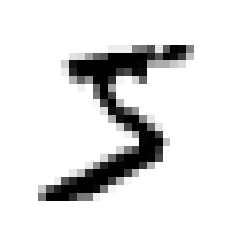

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)


plt.imshow(some_digit_image,cmap='binary')
plt.axis("off")
plt.show

# 1. Support vector machine OvO strategy

In [6]:
from sklearn.svm import SVC
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train) # it will use OvO strategy
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [7]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

array([[ 1.8249344 ,  8.01830986,  0.81268669,  4.8465137 ,  5.87200033,
         9.29462954,  3.8465137 ,  6.94086295, -0.21310287,  2.83645231]])

In [8]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [9]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma = 'auto'))
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

# 2. SGDClassifier

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8565, 0.8715, 0.8635])

In [0]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

# 3. Visualizing confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[572,   0,   1,   2,   1,   9,   3,   1,   3,   0],
       [  0, 637,   6,   3,   1,   5,   0,   1,  16,   2],
       [ 10,  12, 493,  11,  10,   4,  10,   9,  20,   2],
       [  3,   5,  21, 514,   1,  35,   1,   7,  11,  10],
       [  3,   2,   7,   0, 556,   2,  10,   8,   9,  26],
       [  5,   6,   5,  24,  14, 411,  10,   1,  25,  13],
       [  4,   4,   6,   0,   5,   6, 577,   1,   5,   0],
       [  3,   4,   7,   2,   9,   0,   1, 577,   3,  45],
       [  2,  19,  13,  16,   4,  10,   6,   3, 464,  14],
       [  7,   4,   5,   7,  15,   3,   0,  27,  11, 522]])

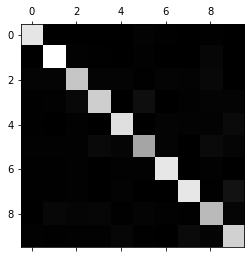

In [24]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# 4. Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state = 42)
cross_val_score(rf_clf, X_train_scaled, y_train, cv = 3, scoring="accuracy")
y_train_pred_rf = cross_val_predict(rf_clf, X_train_scaled, y_train, cv = 3)

In [34]:
conf_mx_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_mx_rf

array([[575,   0,   1,   1,   1,   2,   6,   1,   5,   0],
       [  0, 655,   5,   1,   2,   0,   1,   4,   2,   1],
       [  8,   6, 533,   4,   6,   0,   5,   7,  11,   1],
       [  1,   5,  10, 548,   1,  18,   2,   9,   6,   8],
       [  1,   2,   3,   0, 587,   0,   7,   1,   1,  21],
       [  3,   4,   2,  14,   5, 465,   9,   2,   4,   6],
       [  3,   2,   6,   0,   2,   4, 590,   0,   1,   0],
       [  1,  12,   5,   0,  11,   0,   0, 604,   0,  18],
       [  0,   7,  10,  15,   4,  12,  11,   1, 480,  11],
       [  8,   3,   3,   8,  14,   1,   1,  11,   3, 549]])

In [29]:
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9295, 0.936 , 0.9285])

# 5. KNeighborsClassifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# we create an instance of Neighbours Classifier and fit the data.
kn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance', p= 2)
cross_val_score(kn_clf, X_train_scaled, y_train, cv = 3, scoring="accuracy")
y_train_pred_kn = cross_val_predict(kn_clf, X_train_scaled, y_train, cv = 3)

In [49]:
conf_mx_kn = confusion_matrix(y_train, y_train_pred_kn)
conf_mx_kn

array([[580,   1,   0,   1,   0,   4,   3,   1,   2,   0],
       [  0, 660,   4,   2,   2,   1,   0,   0,   1,   1],
       [  5,  24, 476,  24,   9,   1,  14,  12,  14,   2],
       [  3,   6,  12, 553,   2,   7,   1,  10,   9,   5],
       [  0,  26,  11,   0, 523,   6,   5,   3,   1,  48],
       [  6,   6,   1,  23,   6, 435,  10,   0,  15,  12],
       [ 12,   3,   5,   0,   2,   9, 576,   0,   1,   0],
       [  1,  19,   2,   0,  13,   0,   0, 560,   0,  56],
       [  7,  17,   6,  18,   5,  19,   4,   2, 463,  10],
       [  4,   2,   4,   6,  18,   1,   1,  42,   3, 520]])

In [50]:
cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9265, 0.939 , 0.93  ])

In [54]:
from sklearn.model_selection import GridSearchCV

param_grids = [{"n_neighbors" : [1,5,10,15], "weights" : ["uniform", "distance"]}]
grid_search = GridSearchCV(kn_clf, param_grids, cv=3, scoring ="accuracy", return_train_score = True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 5, 10, 15],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [55]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [58]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
  print(mean_score, params)

0.8849999999999999 {'n_neighbors': 1, 'weights': 'uniform'}
0.8849999999999999 {'n_neighbors': 1, 'weights': 'distance'}
0.8853333333333334 {'n_neighbors': 5, 'weights': 'uniform'}
0.891 {'n_neighbors': 5, 'weights': 'distance'}
0.8809999999999999 {'n_neighbors': 10, 'weights': 'uniform'}
0.8843333333333333 {'n_neighbors': 10, 'weights': 'distance'}
0.8758333333333334 {'n_neighbors': 15, 'weights': 'uniform'}
0.8795000000000001 {'n_neighbors': 15, 'weights': 'distance'}


In [59]:
# grid search using random forest

param_grids = [{"n_estimators" : [1, 100, 1000, 10000], "random_state" : [0, 50, 100], "max_depth": [2,10]}]
grid_search = GridSearchCV(rf_clf, param_grids, cv=3, scoring ="accuracy", return_train_score = True, verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 45.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [60]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 1000, 'random_state': 100}

In [61]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
  print(mean_score, params)

0.304 {'max_depth': 2, 'n_estimators': 1, 'random_state': 0}
0.27183333333333337 {'max_depth': 2, 'n_estimators': 1, 'random_state': 50}
0.27299999999999996 {'max_depth': 2, 'n_estimators': 1, 'random_state': 100}
0.6415000000000001 {'max_depth': 2, 'n_estimators': 100, 'random_state': 0}
0.6491666666666666 {'max_depth': 2, 'n_estimators': 100, 'random_state': 50}
0.6309999999999999 {'max_depth': 2, 'n_estimators': 100, 'random_state': 100}
0.6415000000000001 {'max_depth': 2, 'n_estimators': 1000, 'random_state': 0}
0.644 {'max_depth': 2, 'n_estimators': 1000, 'random_state': 50}
0.6421666666666667 {'max_depth': 2, 'n_estimators': 1000, 'random_state': 100}
0.6443333333333333 {'max_depth': 2, 'n_estimators': 10000, 'random_state': 0}
0.6463333333333333 {'max_depth': 2, 'n_estimators': 10000, 'random_state': 50}
0.6458333333333334 {'max_depth': 2, 'n_estimators': 10000, 'random_state': 100}
0.6576666666666667 {'max_depth': 10, 'n_estimators': 1, 'random_state': 0}
0.6823333333333332 {'m

In [66]:
cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")
y_predict = cross_val_score(kn_clf, X_train, y_train, cv=3, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  16.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] ................................................. , total=  16.1s
[CV]  ................................................................
[CV] ................................................. , total=  16.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   48.3s finished


In [0]:
from sklearn.metrics import accuracy_score
y_predict = cross_val_predict(kn_clf, X_test, y_test, cv=3, verbose =2)
accuracy_score(y_test, y_predict)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 27.3min remaining:    0.0s
